# Introduction to Numpy in Finance - Portfolio Construction

Linear algebra library for manipulating arrays and matrics

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

# NumPy Arrays

NumPy arrays will create an n-dimensional array#

$\text{n-dimensions:}$ $\begin{cases} \text{1-dimension} & \text{list} \\ \text{2-dimension} & \text{list of lists} \\ \text{3-dimension} & \text{list of lists of lists} \end{cases}$

## a. 1-Dimensional Array, i.e Vector

In [2]:
# Create a simple stock return list
stock_list = [3.5, 5, 2, 8, 4.2]

# Parse the list as a numpy array'

returns = np.array(stock_list)
returns

array([3.5, 5. , 2. , 8. , 4.2])

## b. 2-Dimensional Array, i.e. Matrix

In [4]:
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

## Changing Shape of Arrays

- Check the **shape** of the array: using the shape attribute of np.arrays() 

- **Reshape** the array specifying the appropriate number of row and column dimensions

In [8]:
# Check the shape
A.shape

(2, 2)

In [10]:
# Reshape the array
A.reshape(1,4)

array([[1, 2, 3, 4]])

## Indexing and Slicing Arrays

Same principle that applies to Python Lists

### 1-Dimensional Array

In [15]:
# Print first and last element of the returns array
print("first element: {}, last element: {}, elements in between: {}".format(
    returns[0], returns[len(returns) - 1], returns[1:3]))

first element: 3.5, last element: 4.2, elements in between: [5. 2.]


### 2-Dimensional Array (Matrix)

1. **Slicing with row and columns:**

`A[row element i : row element j, col element n : col element m]`

In [26]:
print("{}, first column: {}, first row: {}".format(
            A[:,:], A[:,0], A[0,:]))

[[1 2]
 [3 4]], first column: [1 3], first row: [1 2]


2. **Indexing Matrices by Rows:**

Inputting a single number in as the array argument returns the row indexed to the specified index in the argument

`A[row index]`

**Accessing elements** in the indexed row:

- Either by specifying the element in the index
- or by accessing it by adding another index

`A[row index, element in the row]`

`A[row index][element in the row]`

In [43]:
print("Entire row indexing: {}, \n access elements inside the index: {},\n access elements outside the index: {}"
      .format(A[1], A[1,1], A[1][1]))

Entire row indexing: [3 4], 
 access elements inside the index: 4,
 access elements outside the index: 4


## Array Functions

Most functions are applied to an array element-wise (as scalar-multiplication is).

In [44]:
print("log returns: {}, \n mean returns: {}, \n max return: {}".format(
            np.log(returns), np.mean(returns), np.max(returns)))

log returns: [1.25276297 1.60943791 0.69314718 2.07944154 1.43508453], 
 mean returns: 4.54, 
 max return: 8.0


**Scalars on arrays:**

In [48]:
returns*2 + 5

array([12. , 15. ,  9. , 21. , 13.4])

## NaN Values

NaN values appear when there is missing or non-existant data. `nan` values can lead to errors so it is important to know how to drop them.

- When attempting to apply functions on a vector containing `nan` values, it throws an error

In [36]:
# Create a vector containing a nan value
vector = np.array([1,2,np.nan, 4, 5])

# try to apply a function to the vector
np.mean(vector)

nan

### Indexing Arrays by Boolean Values

#### Step 1: Create a boolean vector of the array as an index

The vector should contain the boolean values of those values which ar **not nan**, `~` means not

`boolean_index = ~np.isnan(vector)`

#### Step 2: Index the array with the boolean vector of not nans

` vector[boolean_index]`


In [41]:
ix = ~ np.isnan(vector)
ix
np.mean(vector[ix])

# can also use nan meana
np.nanmean(vector)

3.0

# Simulating a Universe of Stocks in NumPy

## Step 1: Create Empty Arrays to hold the assets and returns

We will need these arrays to build a portfolio

- Arrays are created with a fixed size and their dimensions cannot be changed without creating a new array

### NP.ZEROS ( )

Creates a NumPy array with the given dimension entirely filled in with $0$

**Vector:** Insert a single number

`np.zeros(number)`

<p style="text-align:center;">$\begin{bmatrix} 0 & 0 & 0 \end{bmatrix}$</p>

**Matrix:** Insert a tuple

`np.zeros((number rows, number columns))`

<p style="text-align:center;">$\begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 0 \end{bmatrix}$</p>

In [8]:
asset_number = 10
assets = np.zeros((asset_number, 100))
returns = np.zeros((asset_number, 100))

## Step 2. Simulate a base asset (for cross-correlation)

We want the universe of stocks to be correlated with each other so we will use this initial value to generate the others

### Random Normal

`np.random.normal(mean, sd, N)`

$N$ is the number of draws we make

### Daily Returns and Current Prices

- **Daily Returns** are drawn from a random normal distrubution, i.e. daily *percentage* returns

- **Current Price** is obtained by taking the cumulative product of these samples

$R_i$ are each 1-dimensional arrays 

**Returns** and **Assets** are 2-dimensional arrays

We set the **initial row** of both:

- `returns`: to be the first return vector of $R_i$, $R_0$

- `assets`: to be the cumulatiove asset price based on $R_0$

In [9]:
# Daily percentage returns
R_1 = np.random.normal(1.03, 0.03, 100)

# Make the first Asset returns equal to the daily percentage returns
returns[0] = R_1

# Make the first Asset price equal to the cumprod of its daily percentage returns
assets[0] = np.cumprod(R_1)

### Create other random assets correlated with Asset 1:

Using the base asset, loop for each asset to get the related returns and asset prices.

We generate $N-1$ securities by adding random white noise to our initial security return

- This ensures that all assets simulated are correlated with each other

In [10]:
# Generate N - 1 assets that are correlated with R_1

for i in range(1,asset_number):
    
    # generate daily percentage returns for each asset
    R_i = R_1 + np.random.normal(0.001, 0.02, 100)
    
    # set returns of each asset to the 1-dimensional array R_i
    returns[i] = R_i
    
    # set asset prices to the cumprod of R_i
    assets[i] = np.cumprod(R_i) 

### Get assets characteristics:

- **Mean:** Construct an array containing the mean values standardized as percentages of each N asset

<p style="text-align:center;">$mean_{\text{returns}_i} = (mean_i - 1)*100$</p>

- **Volatility:** Construct an array containing the std values of each N asset

In [11]:
# Get mean of returns
mean_returns = [(np.mean(ret) - 1)*100 for ret in returns]

# Get volatilities of the returns
return_volatilities = [np.std(ret) for ret in returns]

### Plot the Results

`np.arange(N)`: Creates a sequence of $N$ numbers, similar to `range(N)` function in Python

We plot a barchart with as:

- $X$'s: a sequence of numbers whose length equals that of the number of assets we currently have

- $Y$'s: The mean returns $\forall$ asset

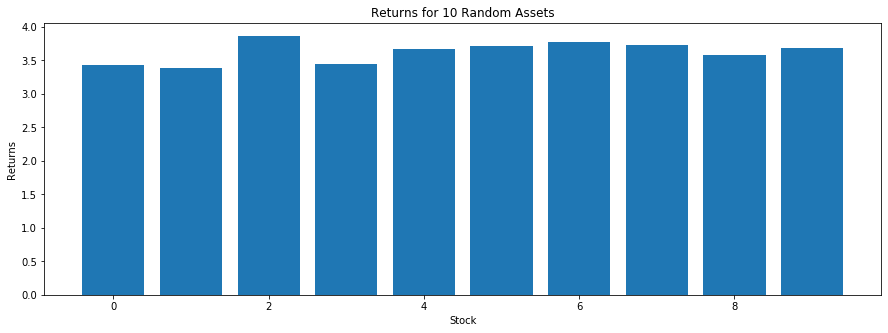

In [12]:
# Plot a bar chart
plt.bar(np.arange(len(mean_returns)), mean_returns)
plt.xlabel("Stock")
plt.ylabel("Returns")
plt.title("Returns for {} Random Assets".format(asset_number))
plt.show()

## Step 3. Calculate Expected Return

We now have our universe of stocks, the next step is to put them together in a portfolio and calculate its expected return and risk.

### Generate N Random Weights

for each asset in the portfolio, we will assume these weights to be equally distributed following a random uniform distribution.

<p style="text-align:center;">$\text{weight}_i \sim U(0,1)$</p>

<p style="text-align:center;">$\text{percentage weights}_i = \frac{\text{weight}_i}{\sum(\text{weight}_i)}$</p>

Using the pecentage weights, we are **rescaling** the weights vector by the sum total of <i>all weights</i>. This is used to ensure that $100%$ of the portfolio's cash is used.

- **Rescaling** is required to make sure the weights all add up to 1

In [13]:
weights = np.random.uniform(0, 1, asset_number)
perc_weights = weights/np.sum(weights)

### Calculate the Mean of the Portfolio

The mean of the portfolio is calculated in the following way:

<p style="text-align:center;"> $\omega \cdot \mu = \omega_1\mu_1 + ... + \omega_N \mu_N = \mu_P$ </p>

$\omega = [\omega_1, \omega_2, ..., \omega_N]$

$\mu = [\mu_1, \mu_2, ..., \mu_N]$

#### Dot Product in NumPy

**For a 1-dimensional array:**

`np.dot(x, y)` computes the dot product of two vectors

**For a 2-dimensional array:** 

<p style="text-align:center;">$\text{(m x n) } \cdot \text{ (n x m)} = \text{(m x m)}$</p>

In [14]:
portfolio_returns = round(np.dot(perc_weights, mean_returns), 2)
print("Portfolio Expected Return: {}".format(portfolio_returns))

Portfolio Expected Return: 3.63


## Step 4. Calculate Portfolio Variance

**If assets were independent:**

<p style="text-align:center;"> $var(P) = var(\omega_1S_1 + \omega_2S_2 + ... + \omega_NS_N) = var(\omega_1S_1) + ... + var(\omega_NS_N) = \omega_1^2\sigma_1^2 + ... + \omega_N^2\sigma_N^2$ </p>

**Assets by construction have a degree of correlation:**

<p style="text-align:center;"> $var(P) = \sigma_P^2 = \sum_i(\omega_i^2\sigma_i^2) + \sum_i\sum_{i\neq j}(\omega_i\omega_j\sigma_i\sigma_j\rho_{i,j})$ </p>

$i,j \in {1,2, ..., N}$

$\rho_{i,j} = \frac{\sigma_{S_i,S_j}}{\sigma_i\sigma_j}$

### Get Var-Covariance Matrix
<p style="text-align:center;"> $C = \begin{bmatrix} var(S_1) & cov(S_1, S_2) & . & . & . & cov(S_1, S_N) \\ cov(S_2, S_1) & var(S_2) & . & . & . & cov(S_2, S_N) \\ . & . & . & . & . & . & \\ . & . & . & .& .& .\\cov(S_N, S_1) & cov(S_N, S_2) & . & . & . & var(S_N) \end{bmatrix} $ </p>

In [20]:
cov_mat = np.cov(returns)

### Get the Portfolio Variance

The variance-covariance matrix enables us to calculate the portfolio variance by using the matrix $C$ as the transformation matrix to our basis vector of weights $\omega$

<p style="text-align:center;"> $\sigma_p^2 = \omega C \omega^T$ </p>
<p style="text-align:center;"> $(1x1) = (1xN) \cdot (NxN) \cdot (Nx1)$ </p>

In [22]:
# Calculate portfolio variance

portfolio_variance = np.dot(np.dot(weights, cov_mat), weights.T)

# Get volatility of portfolio#

portfolio_volatility = round(np.sqrt(portfolio_variance),4)

print("Portfolio Volatility is: {}".format(portfolio_volatility))

Portfolio Volatility is: 0.1302
